True


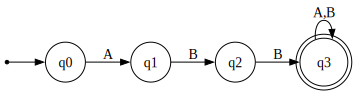

In [1]:
from automata.fa.dfa import DFA
import random 
# Define the set of states, input symbols, start state, and accept states
states = {'q0', 'q1', 'q2', 'q3'}
alphabet = {'A', 'B'}
start_state = 'q0'
accept_states = {'q3'}

# Define the transitions
transitions = {
    'q0': {'A': 'q1'},
    'q1': {'B': 'q2'},
    'q2': {'B': 'q3'}
}
transitions['q3'] = {'A': 'q3', 'B': 'q3'}
# Create the DFA
dfa = DFA(
    states=states,
    input_symbols=alphabet,
    transitions=transitions,
    initial_state=start_state,
    final_states=accept_states,
    allow_partial=True
    )

t1 = dfa.transitions['q0']
t2 = dfa.transitions.get('q0', '')
# Test the DFA on a string
print(dfa.accepts_input('ABB'))  # Output: True
dfa 

# Function to generate an accepted word
# def generate_accepted_word(dfa, current_state=None, current_word=''):
#     if current_state is None:
#         current_state = dfa.initial_state

#     # If current state is an accept state, return the current word
#     if current_state in dfa.final_states:
#         return current_word

#     # Get possible transitions from the current state
#     transitions = dfa.transitions.get(current_state, {})

#     # Randomly pick one of the possible transitions
#     if transitions:
#         symbol, next_state = random.choice(list(transitions.items()))
#         return generate_accepted_word(dfa, next_state, current_word + symbol)

#     # If no valid transitions, return None
#     return None

# # Generate and print an accepted word
# accepted_word = generate_accepted_word(dfa)
# print("Generated accepted word:", accepted_word)


True
False


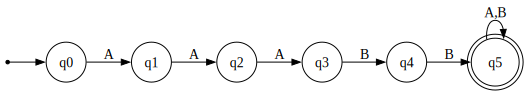

In [18]:
from automata.fa.dfa import DFA
import numpy as np 

def create_dfa(n, m):
    # Define DFA states
    states = {f'q{i}' for i in range(n + m + 1)}  # States q0 to q(n+m)
    
    # Initial state
    initial_state = 'q0'
    
    # Accepting state (after n 'A's and m 'B's)
    accepting_states = {f'q{n+m}'}
    
    # # Transition function
    # transitions = {(f'q{i}', 'B'): f'q{i+1}' for i in range(3)}
    transitions_A = { f'q{i}': {'A': f'q{i+1}'} for i in range(n) }
    transitions_B = { f'q{i}': {'B': f'q{i+1}'} for i in range(n, n+m) }
    transitions = transitions_A | transitions_B
    # transitions = {}
    
    # # Transitions for 'A's (first n transitions)
    # for i in range(n):
    #     transitions[f'q{i}'] = {'A': f'q{i+1}'}
    
    # # Transitions for 'B's (next m transitions)
    # for i in range(n, n + m):
    #     transitions[f'q{i}'] = {'B': f'q{i+1}' }
    # add final transitions to keep auto_lib happy
    transitions[f'q{n+m}'] = {'A': f'q{n+m}', 
                              'B': f'q{n+m}'}
    # Create DFA
    dfa = DFA(
        states=states,
        input_symbols={'A', 'B'},
        transitions=transitions,
        initial_state=initial_state,
        final_states=accepting_states, 
        allow_partial=True
    )
    
    return dfa

# Example: Create DFA that accepts 3 'A's followed by 2 'B's
n = 3
m = 2
dfa = create_dfa(n, m)

# Test DFA
test_string = "AAABB"  # This should be accepted
print(dfa.accepts_input(test_string))  # Output: True

test_string = 'AABBB'  # This should be rejected
print(dfa.accepts_input(test_string))  # Output: False
dfa 

In [26]:
from hmmlearn import hmm
import numpy as np

# Define HMM with Gaussian emissions (continuous observations)
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

# Define transition matrix and start probabilities
model.startprob_ = np.array([0.6, 0.4])
model.transmat_ = np.array([[0.7, 0.3], [0.4, 0.6]])

# Define means and variances of the Gaussian distributions for each state
model.means_ = np.array([[0.0], [3.0]])  # Means for each state
model.covars_ = np.array([[1.0], [2.0]])  # Variances for each state

# Observations (continuous values)
observations = np.array([[0.1], [2.9], [0.2]])

# Compute forward probabilities
logprob, fwd_prob = model.score_samples(observations)

print(f"Forward probabilities:\n{fwd_prob}")
 

Forward probabilities:
[[0.92012698 0.07987302]
 [0.02071578 0.97928422]
 [0.90775895 0.09224105]]


In [5]:
from hmmlearn import hmm
from automata.fa.dfa import DFA
import numpy as np 

def DFAnorm2HMMnorm(dfa, symbol2var, num_features):
    '''
    Function to map DFA to HMM where each transition symobol 
    in DFA represents a zero mean gaussian distribution whose variance 
    is specified by symbol2var.

    INPUTS
    dfa        - dfa object as defined by automata-lib
    symbol2var - dictionary mapping each symbol in dfa 
                alphabet SIGMA to corresponding variance of zero-mean gaussian distribution
    num_features - dimension of observaitons.

    OUTPUTS
    HMM   - hidden markov model structure FILL IN DETAILS
    TABLE - array describing transitions within HMM 
    '''
    HMM_start_ind = []
    HMM_stop_ind  = []
    states_HMM_list = []
    cov_list = []
    transitions = dfa.transitions
    for state_current, trans_current in transitions.items():
        # trans_current =~ {state_current:{sigma_i:state_i, ...}}
        for sigma_current, state_new in trans_current.items():
            state_current_HMM = [state_current, sigma_current]
            if state_current_HMM not in states_HMM_list:
                # add to list of HMM states if not already there
                states_HMM_list.append(state_current_HMM)
                cov_current = symbol2var[sigma_current]
                cov_list.append(cov_current)
            trans_new = transitions.get(state_new, '')
            for sigma_new in trans_new.keys():
                state_new_HMM = [state_new, sigma_new]
                if state_new_HMM not in states_HMM_list:
                    states_HMM_list.append(state_new_HMM)
                    cov_new = symbol2var[sigma_new]
                    cov_list.append(cov_new)
                # if not added to HMM_transitions add (s, sigma) --> (s_new, sigma_new)
                # save indices for valid transitions
                HMM_current_index = states_HMM_list.index(state_current_HMM)
                HMM_new_index     = states_HMM_list.index(state_new_HMM)

                HMM_start_ind.append(HMM_current_index)
                HMM_stop_ind.append(HMM_new_index)

    HMM_num_states = len( states_HMM_list )
    HMM_model = hmm.GaussianHMM(n_components=HMM_num_states, covariance_type="full")

    HMM_model.startprob_ = np.ones(HMM_num_states)/HMM_num_states 
    HMM_model.transmat_  = np.zeros( (HMM_num_states, HMM_num_states) )
    HMM_model.transmat_[HMM_start_ind,HMM_stop_ind]  = 1.0

    HMM_model.means_  = np.zeros( (HMM_num_states, num_features) )
    cov_array = np.array(cov_list)
    HMM_model.covars_ = cov_array

    return HMM_model, states_HMM_list, HMM_start_ind, HMM_stop_ind

symbol2var = {'A': np.array([[1]]), 'B': np.array([[2]])}

model, states, start, stop = DFAnorm2HMMnorm(dfa=dfa, symbol2var=symbol2var,num_features=1)





In [42]:
my_dict = {'a': 1, 'b': 2, 'c': 3}

for key, value in my_dict.items():
    print(key)
    print(value)

list = [ ['a',4], {'a':4} ]
type(list[1])
my_dict['a']

a
1
b
2
c
3


1